### Problem Statement - Find the Distinct Groups of Customers Present in the Mall Data Using K Means Clustering

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv("Mall_Customers.csv")

data.shape

(200, 5)

In [35]:
data.head(50)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### We will be using Annual Income and Spending Score of the Customers to create Cluster

#### Plotting Scatterplot for better understanding of Data

C:\Users\nikhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

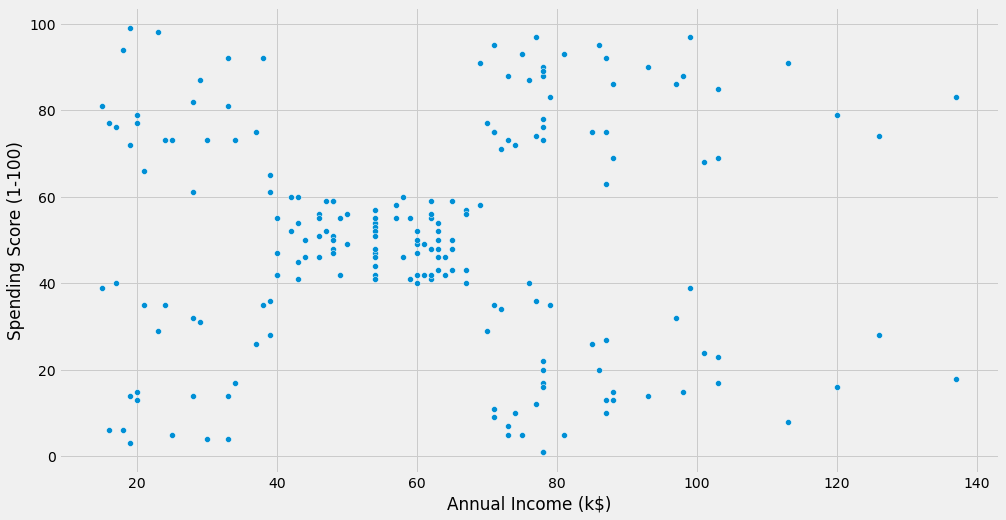

In [36]:
sns.scatterplot(data["Annual Income (k$)"], data["Spending Score (1-100)"])

#### Elbow Method for deciding K

In [37]:
x = data.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

x.shape

(200, 2)

C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


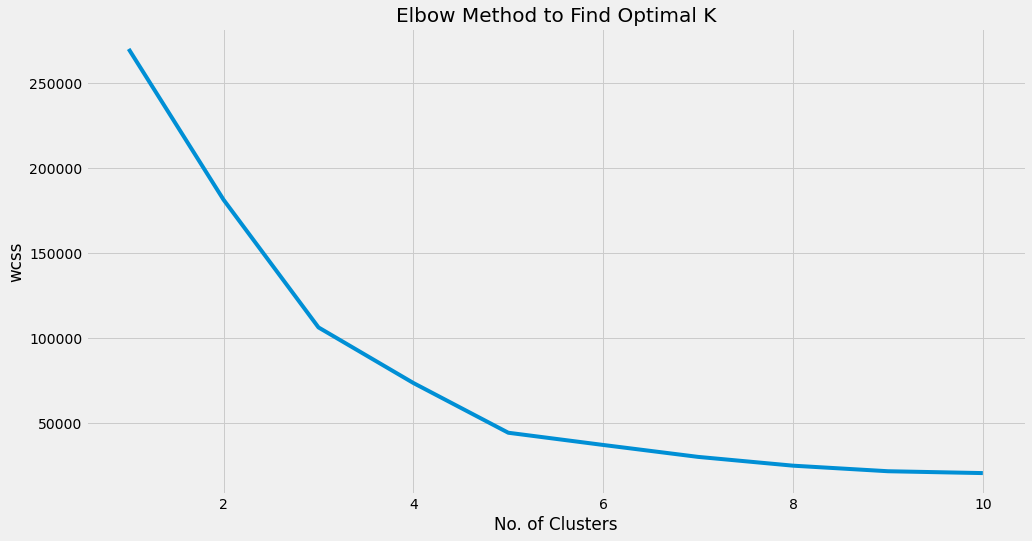

In [38]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Elbow Method to Find Optimal K", fontsize = 20)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

#### Last Elbow occurs at 5, hence optimal number of clusters are 5

### Implementing K Means Clustering Analysis

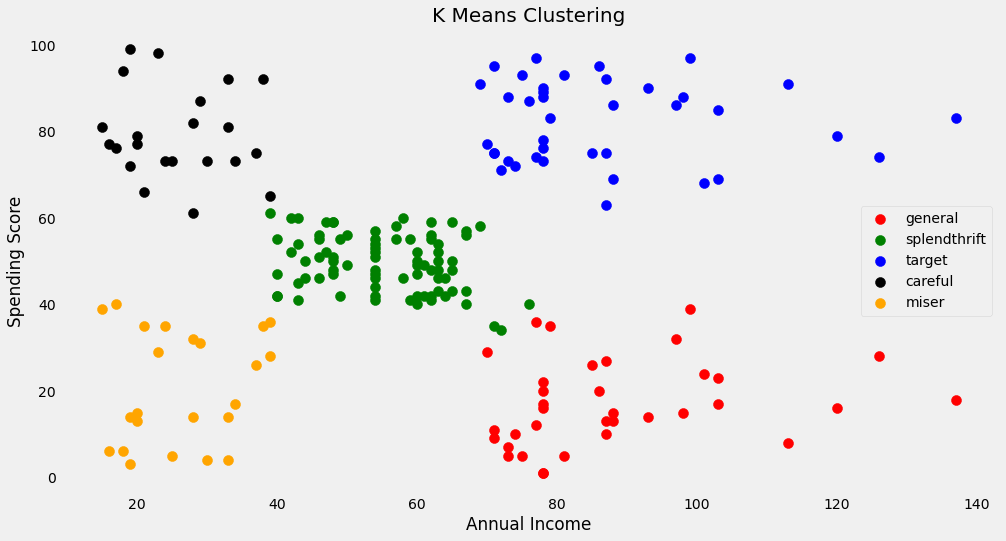

In [39]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)

# To get Clusters
y_means = km.fit_predict(x)

#Plotting Scatter Plot to understand better

plt.rcParams["figure.figsize"] = (15,8)
plt.style.use("fivethirtyeight")

plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 100, c = "red", label = "general")
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 100, c = "green", label = "splendthrift")
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 100, c = "blue", label = "target")
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s = 100, c = "black", label = "careful")
plt.scatter(x[y_means == 4,0], x[y_means == 4,1], s = 100, c = "orange", label = "miser")

plt.style.use("fivethirtyeight")
plt.title("K Means Clustering", fontsize = 20)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.grid()
plt.show()

### Inference got from this Analysis : There are 5 distinct segments of customers namely General, Splendthrift, Target, Careful and Miser


### Validating our Results using Silhouette Method

In [40]:
from sklearn.metrics import silhouette_score

# Calculating score
score = silhouette_score(x, km.labels_, metric = "euclidean")

print("Silhouette Score is %.3f" %score)

Silhouette Score is 0.554


In [44]:

from yellowbrick.cluster import SilhouetteVisualizer

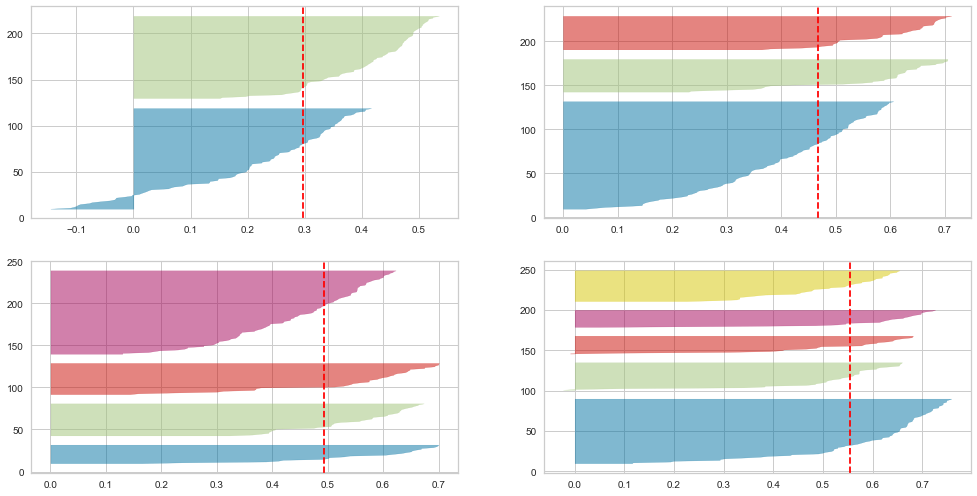

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))

#Check for other No. of Cluster
for i in [2,3,4,5]:
    km = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i,2)
    
    visualizer = SilhouetteVisualizer(km, colors="yellowbrick", ax=ax[q-1][mod])
    visualizer.fit(x)

### Clustering Multiple Dimensions

#### We can perform Clustering Analysis on any number of features but we can visualize the clusters only for 2 and 3 cluster

In [51]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
a = data.loc[:, ["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

print(a.shape)

(200, 3)


C:\Users\nikhi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


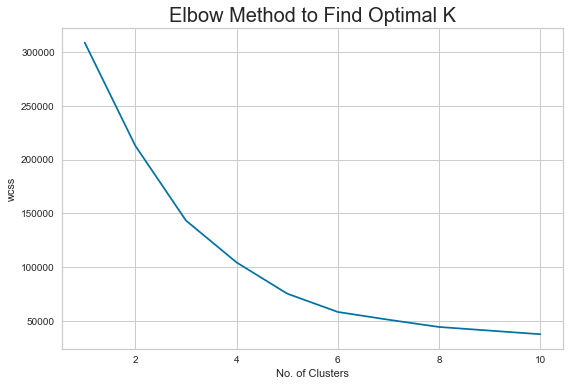

In [53]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    km.fit(a)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("Elbow Method to Find Optimal K", fontsize = 20)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

In [58]:
# Performing K Means Clustering Analysis with k=6

km = KMeans(n_clusters = 6, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(a)

y_means = pd.DataFrame(y_means)
df = pd.concat([data, y_means], axis = 1)
df = df.rename(columns = {0:"Clusters"})
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,5
1,2,Male,21,15,81,4
2,3,Female,20,16,6,5
3,4,Female,23,16,77,4
4,5,Female,31,17,40,5


In [63]:
print("Customer IDs for Cluster 1 is : ", df[df['Clusters'] == 0]["CustomerID"].values)
print()
print("Customer IDs for Cluster 2 is : ", df[df['Clusters'] == 1]["CustomerID"].values)
print()
print("Customer IDs for Cluster 3 is : ", df[df['Clusters'] == 2]["CustomerID"].values)
print()
print("Customer IDs for Cluster 4 is : ", df[df['Clusters'] == 3]["CustomerID"].values)
print()
print("Customer IDs for Cluster 5 is : ", df[df['Clusters'] == 4]["CustomerID"].values)
print()
print("Customer IDs for Cluster 6 is : ", df[df['Clusters'] == 5]["CustomerID"].values)

Customer IDs for Cluster 1 is :  [ 44  48  49  50  52  53  59  62  66  69  70  76  78  79  82  85  88  89
  92  94  95  96  98 100 101 104 106 112 113 114 115 116 121 122 123 125
 133 143]

Customer IDs for Cluster 2 is :  [ 41  43  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72
  73  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105
 107 108 109 110 111 117 118 119 120]

Customer IDs for Cluster 3 is :  [127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

Customer IDs for Cluster 4 is :  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

Customer IDs for Cluster 5 is :  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]

Customer IDs for Cluster 6 is :  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 45]
